In [1]:
import numpy as np
# from tempfile import TemporaryFile
import os
import pickle
import random 
import operator
import math
import numpy as np
import matplotlib.pyplot as plt
import librosa 
import librosa.display
import IPython.display as ipd

Gather all features:
* MFCC: 
* Spectral Centroid:
* Spectral Bandwidth:
* Zero Crossing Rate:
* Rolloff-mean:
* Harmony:
* Perceptr:
* Tempo:
* Chroma:
* RMS:https://librosa.org/doc/main/generated/librosa.feature.rms.html

In [2]:
%%time
directory = "../data/"
data = []
classes = []
for folder in os.listdir(directory):
    if folder=="mf_files":
        continue
    for file in os.listdir(directory+folder):  
        sig, rate = librosa.load(directory+folder+"/"+file)
        mfcc_feat = librosa.feature.mfcc(y =sig, sr= rate)
        mean_matrix = mfcc_feat.mean(1)
        var_matrix = mfcc_feat.var(1)
        data.append(np.array([mean_matrix,var_matrix]).flatten())
        classes.append(folder)

CPU times: user 3min 35s, sys: 7.53 s, total: 3min 43s
Wall time: 1min 2s


### KNN

0.596
KNeighborsClassifier(n_jobs=-1, n_neighbors=6, weights='distance')
CPU times: user 674 ms, sys: 368 ms, total: 1.04 s
Wall time: 4.33 s


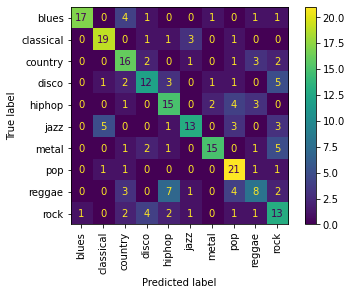

In [4]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data = np.array(data)
classes = np.array(classes)
trainX, testX, trainY, testY = train_test_split(data, 
                                                classes,
                                                test_size = 0.25, 
                                                random_state=29,
                                                stratify = classes)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
clf = GridSearchCV(estimator=KNeighborsClassifier(n_jobs = -1), 
                   param_grid = {"n_neighbors" : np.arange(4,30,1),
                               "weights" : ["uniform", "distance"]}, 
                   cv =5, n_jobs = -1)
clf.fit(trainX, trainY)
print(clf.score(testX, testY))
print(clf.best_estimator_)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = testY, y_pred = clf.predict(testX), 
                                        xticks_rotation= "vertical")

### Logistic Regression

0.628
LogisticRegressionCV(max_iter=10000, n_jobs=-1, solver='saga')
CPU times: user 48.6 s, sys: 1.31 s, total: 49.9 s
Wall time: 1min 32s


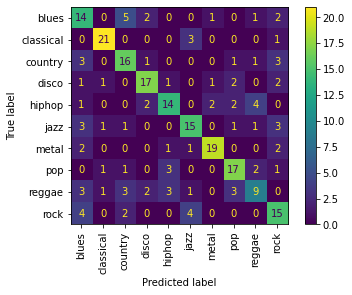

In [5]:
%%time
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
data = np.array(data)
classes = np.array(classes)
trainX, testX, trainY, testY = train_test_split(data, 
                                                classes,
                                                test_size = 0.25, 
                                                random_state=29,
                                                stratify = classes)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
clf = GridSearchCV(estimator=LogisticRegressionCV(n_jobs = -1, max_iter = 10000), 
                   param_grid = {"solver" : ["saga", "lbfgs"]}, 
                   cv =5, n_jobs = -1)
clf.fit(trainX, trainY)
print(clf.score(testX, testY))
print(clf.best_estimator_)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = testY, y_pred = clf.predict(testX), 
                                        xticks_rotation= "vertical")

### Random Forest

0.668
RandomForestClassifier(max_depth=11, n_estimators=400, n_jobs=-1)
CPU times: user 2.48 s, sys: 196 ms, total: 2.67 s
Wall time: 6min 55s


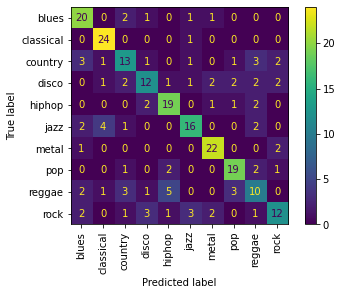

In [5]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data = np.array(data)
classes = np.array(classes)
trainX, testX, trainY, testY = train_test_split(data, 
                                                classes,
                                                test_size = 0.25, 
                                                random_state=29,
                                                stratify = classes)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
clf = GridSearchCV(estimator=RandomForestClassifier(n_jobs = -1), 
                   param_grid = {"criterion" : ["gini", "entropy"],
                                 "n_estimators": np.arange(100,501, 100),
                                 "max_depth": np.arange(1,20,1)}, 
                   cv =5, n_jobs = -1)
# clf = RandomForestClassifier()
clf.fit(trainX, trainY)
print(clf.score(testX, testY))
print(clf.best_estimator_)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = testY, y_pred = clf.predict(testX), 
                                        xticks_rotation= "vertical")

### AdaBoost

0.664
AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.9,
                   n_estimators=160)
CPU times: user 2.89 s, sys: 224 ms, total: 3.12 s
Wall time: 2min 43s


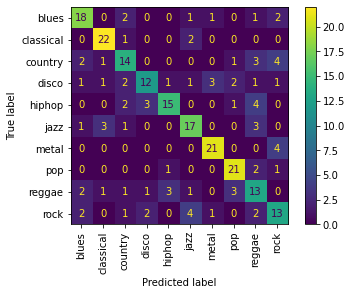

In [7]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
data = np.array(data)
classes = np.array(classes)
trainX, testX, trainY, testY = train_test_split(data, 
                                                classes,
                                                test_size = 0.25, 
                                                random_state=29,
                                                stratify = classes)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
clf = GridSearchCV(estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()), 
                   param_grid = { "learning_rate": np.arange(0.1,2,.1),
                                 "n_estimators": np.arange(50,300,10)}, 
                   cv =5, n_jobs = -1)
clf.fit(trainX, trainY)
print(clf.score(testX, testY))
print(clf.best_estimator_)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = testY, y_pred = clf.predict(testX), 
                                        xticks_rotation= "vertical")

### Gradient Boost

0.624
GradientBoostingClassifier(learning_rate=0.5, n_estimators=140)
CPU times: user 11.6 s, sys: 141 ms, total: 11.7 s
Wall time: 35min 18s


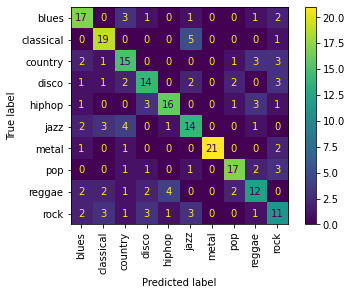

In [9]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
data = np.array(data)
classes = np.array(classes)
trainX, testX, trainY, testY = train_test_split(data, 
                                                classes,
                                                test_size = 0.25, 
                                                random_state=29,
                                                stratify = classes)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trainX)
trainX = scaler.transform(trainX)
testX = scaler.transform(testX)


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
clf = GridSearchCV(estimator=GradientBoostingClassifier(), 
                   param_grid = { "learning_rate": np.arange(0.1,1,.1),
                                 "n_estimators": np.arange(50,300,10)}, 
                   cv =5, n_jobs = -1)
clf.fit(trainX, trainY)
print(clf.score(testX, testY))
print(clf.best_estimator_)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = testY, y_pred = clf.predict(testX), 
                                        xticks_rotation= "vertical")